In [1]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [2]:
data_directory = 'ecephys_project_cache' # must be updated to a valid directory in your filesystem

manifest_path = os.path.join(data_directory, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [3]:
sessions = cache.get_session_table()

print('Total number of sessions: ' + str(len(sessions)))

sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [11]:
filtered_sessions = sessions[(sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISpm' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

session = cache.get_session_data(filtered_sessions.index.values[2],
                                 isi_violations_maximum = np.inf,
                                 amplitude_cutoff_maximum = np.inf,
                                 presence_ratio_minimum = -np.inf
                                )


appended_histogram = []
my_data = list()
my_data_even = list()

presentations = session.get_stimulus_table("flashes")
units = session.units[session.units["ecephys_structure_acronym"] == 'VISpm']

time_step = 0.01
time_bins = np.arange(-0.1, 1.0 + time_step, time_step)

# histogram for odd presentation index
histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values[presentations.index.values % 2 ==1],  
    bin_edges=time_bins,
    unit_ids=units.index.values
)
mean_histograms = histograms.mean(dim="stimulus_presentation_id")
    
mean_histograms1 = mean_histograms.to_pandas()
    
my_data.append(mean_histograms1)
    
# histogram for even presentation index
histograms_even = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values[presentations.index.values % 2 ==0],  
    bin_edges=time_bins,
    unit_ids=units.index.values
)
mean_histograms_even = histograms_even.mean(dim="stimulus_presentation_id")
    
mean_histograms1_even = mean_histograms_even.to_pandas()
    
my_data_even.append(mean_histograms1_even)
    

appended_histogram1 = pd.concat(my_data, axis=1)

appended_histogram2 = xr.DataArray(appended_histogram1) 

appended_histogram1_even = pd.concat(my_data_even, axis=1)

appended_histogram2_even = xr.DataArray(appended_histogram1_even) 

C:\ProgramData\Anaconda3\lib\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py:1086: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


In [11]:
appended_histogram1.to_csv (r'E:\allen_neuropixels\export_dataframe_VISpm_2s_odd.csv', index = True, header=True)
appended_histogram1_even.to_csv (r'E:\allen_neuropixels\export_dataframe_VISpm_2s_even.csv', index = True, header=True)

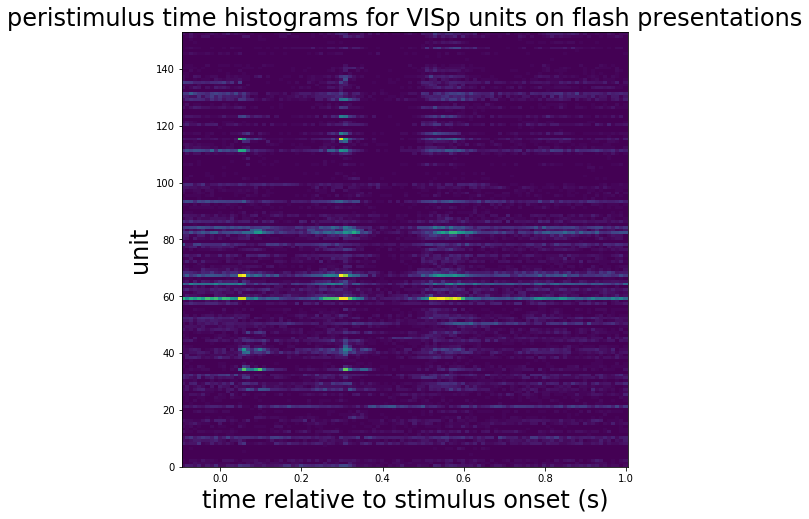

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    appended_histogram2["time_relative_to_stimulus_onset"], 
    np.arange(appended_histogram2["unit_id"].size),
    appended_histogram2.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on flash presentations", fontsize=24)

plt.show()
# plt.savefig('PM_PSTH.svg')

In [14]:
filtered_sessions

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
742951821,2019-10-03T00:00:00Z,723627604,brain_observatory_1.1,120.0,M,wt/wt,893,2219,6,"[VISal, nan, grey, VISl, VISrl, VISp, VISpm, VIS]"
746083955,2019-10-03T00:00:00Z,726170935,brain_observatory_1.1,98.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,582,2216,6,"[VPM, TH, LGd, CA3, CA2, CA1, VISal, nan, grey..."
750332458,2019-10-03T00:00:00Z,726141251,brain_observatory_1.1,91.0,M,wt/wt,902,2216,6,"[grey, VISrl, nan, VISal, IntG, IGL, LGd, CA3,..."
750749662,2019-10-03T00:00:00Z,726162197,brain_observatory_1.1,92.0,M,wt/wt,761,2223,6,"[LP, DG, CA1, VISp, nan, LGd, CA3, VISrl, VPM,..."
751348571,2019-10-03T00:00:00Z,732548380,brain_observatory_1.1,93.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,859,2217,6,"[grey, LGv, CA3, DG, CA1, VISl, nan, APN, POL,..."
